In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Pokemon.csv"  

data = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "abcsds/pokemon",
    file_path,
)
print(data.head())

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27672\3855979517.py:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  data = kagglehub.load_dataset(


   #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


In [2]:
# Importing necessary libraries
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings("ignore")

from ipywidgets import interact, widgets, Layout
from IPython.display import display

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
# Load the data
# data = pd.read_csv("/kaggle/input/pokemon/Pokemon.csv")
data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
def overview(data):
    print("=".center(50,"="))
    print(f"\nPokemon with Stats Overview")
    print(f"Shape: {data.shape}")
    print("=".center(50,"="))

    print("Information about the features:")
    print(data.info())
    print("=".center(50,"="))

    print("Basic statistics check:")
    print(data.describe())
    print("=".center(50,"="))

    print("Checking the number of unique values:")
    unique_counts = {}
    for column in data.columns:
        unique_counts[column] = data[column].nunique()
    unique_df = pd.DataFrame(unique_counts, index=["Unique Count"]).transpose()
    print(unique_df)
    print("=".center(50, "="))

In [5]:
overview(data)


Pokemon with Stats Overview
Shape: (800, 13)
Information about the features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB
None
Basic statistics check:
                #      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.00

In [6]:
print("Renames the dataset and removes spaces for easier handling: ")
data = data.rename(columns={
        "Type 1": "Type_1",
        "Type 2": "Type_2",
        "Sp. Atk": "Sp_Atk",
        "Sp. Def": "Sp_Def"
    })
data.head()

Renames the dataset and removes spaces for easier handling: 


,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# **Fields and Data Types 🧬**  
Dataset containing base stats, types, and metadata of 800 Pokémon across all generations. Ideal for data analysis, machine learning, and clustering experiments.

## **Data Dictionary**

### **Core Fields**

| **Parameter**    | **Description**                                                    | **Data Type**     | **Range/Values**                       |
|------------------|--------------------------------------------------------------------|-------------------|----------------------------------------|
| `#`              | Pokédex number (identifier).                                       | Numerical (int)   | 1–800                                  |
| `Name`           | Pokémon name.                                                      | Categorical       | e.g., "Bulbasaur", "Pikachu"           |
| `Type 1`         | Primary elemental type.                                            | Categorical       | e.g., "Grass", "Fire", "Water"         |
| `Type 2`         | Secondary type (can be null).                                      | Categorical       | e.g., "Poison", "Flying", or null      |
| `Total`          | Sum of all base stats.                                             | Numerical (int)   | Varies (e.g., 180–780)                 |
| `HP`             | Base hit points (health).                                          | Numerical (int)   | Typically 1–255                        |
| `Attack`         | Base physical attack power.                                        | Numerical (int)   | Varies (e.g., 5–190)                   |
| `Defense`        | Base physical defense.                                             | Numerical (int)   | Varies (e.g., 5–230)                   |
| `Sp. Atk`        | Base special attack power.                                         | Numerical (int)   | Varies (e.g., 10–194)                  |
| `Sp. Def`        | Base special defense.                                              | Numerical (int)   | Varies (e.g., 20–230)                  |
| `Speed`          | Base speed stat.                                                   | Numerical (int)   | Varies (e.g., 5–180)                   |
| `Generation`     | Game generation (1–6).                                             | Numerical (int)   | 1 to 6                                 |
| `Legendary`      | Indicates if the Pokémon is considered a legendary.                | Boolean           | `True` / `False`                       |

---

### **Dataset Overview**

- **Size**: 800 entries × 13 columns  
- **Missing Values**: Present in `Type 2` (386 nulls).  
- **Balanced Fields**: Most features are complete; only one column has missing data.  
- **Format**: CSV-compatible; structured and ready for use with Python (`pandas`).

---

### **Key Statistics**

| **Feature**   | **Min** | **Max** | **Notes**                                      |
|---------------|---------|---------|------------------------------------------------|
| `Total`       | ~180    | ~780    | Higher totals correlate with stronger Pokémon. |
| `Attack`      | ~5      | ~190    | High in offensive types (e.g., Fighting).      |
| `Defense`     | ~5      | ~230    | High in bulky or defensive types.              |
| `Speed`       | ~5      | ~180    | Critical for battle mechanics.                 |
| `Legendary`   | -       | -       | ~10% of dataset are legendary Pokémon.         |

---

### **Notes**

- **Missing Values**: `Type 2` is null for single-typed Pokémon. Consider replacing with "None" or one-hot encoding accordingly.  
- **Categorical Fields**: `Type 1`, `Type 2`, `Legendary` can be used for filtering, grouping, or modeling.  
- **Stat Aggregation**: `Total` is derived from sum of base stats — useful for ranking and clustering.  
- **Applications**:
  - Clustering Pokémon by stat profile (`KMeans`, `DBSCAN`).
  - Visualizing stat distributions by generation or type.
  - Predicting legendary status using classification models.
  - Heatmaps of correlation between stats.

---

# Missing values

In [7]:
# Check for missing values
print(data.isnull().sum())

#               0
Name            0
Type_1          0
Type_2        386
Total           0
HP              0
Attack          0
Defense         0
Sp_Atk          0
Sp_Def          0
Speed           0
Generation      0
Legendary       0
dtype: int64


In [8]:
# Handles missing values for datasets with mixed feature types.
def handle_missing_values(data, drop_threshold=0.8, 
                          numerical_strategy='median', 
                          categorical_strategy='mode', 
                          fallback_categorical_value='None'):
    # Imputes missing values in a DataFrame.
    """
    Parameters:
    - data: Input dataset.
    - drop_threshold: Proportion of non-null entries required to keep a column.
    - numerical_strategy: 'median', 'mean', or 'zero' for numerical imputation.
    - categorical_strategy: 'mode' or fallback for categorical imputation.
    - fallback_categorical_value: Value to use when strategy is not 'mode'.

    Returns:
    - processed_data: DataFrame with missing values handled.
    """
    # Copy data to avoid modifying original DataFrame
    processed_data = data.copy()

    # 1. Drop columns with too many missing values
    #threshold = len(processed_data) * drop_threshold
    #processed_data = processed_data.dropna(thresh=threshold, axis=1)

    # 2. Handle categorical features
    categorical_cols = processed_data.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        if processed_data[col].isnull().sum() > 0:
            if categorical_strategy == 'mode':
                fill_value = processed_data[col].mode()[0]
            else:
                fill_value = fallback_categorical_value
            processed_data[col].fillna(fill_value, inplace=True)

    # 3. Handle numerical features
    numerical_cols = processed_data.select_dtypes(include=np.number).columns
    for col in numerical_cols:
        if processed_data[col].isnull().sum() > 0:
            if numerical_strategy == 'median':
                fill_value = processed_data[col].median()
            elif numerical_strategy == 'mean':
                fill_value = processed_data[col].mean()
            else:
                fill_value = 0
            processed_data[col].fillna(fill_value, inplace=True)
    return processed_data

In [9]:
data = handle_missing_values(data, categorical_strategy='fallback', fallback_categorical_value='None')

In [10]:
# Check for missing values
print(data.isnull().sum())

#             0
Name          0
Type_1        0
Type_2        0
Total         0
HP            0
Attack        0
Defense       0
Sp_Atk        0
Sp_Def        0
Speed         0
Generation    0
Legendary     0
dtype: int64


# EDA (Exploratory Data Analysis)

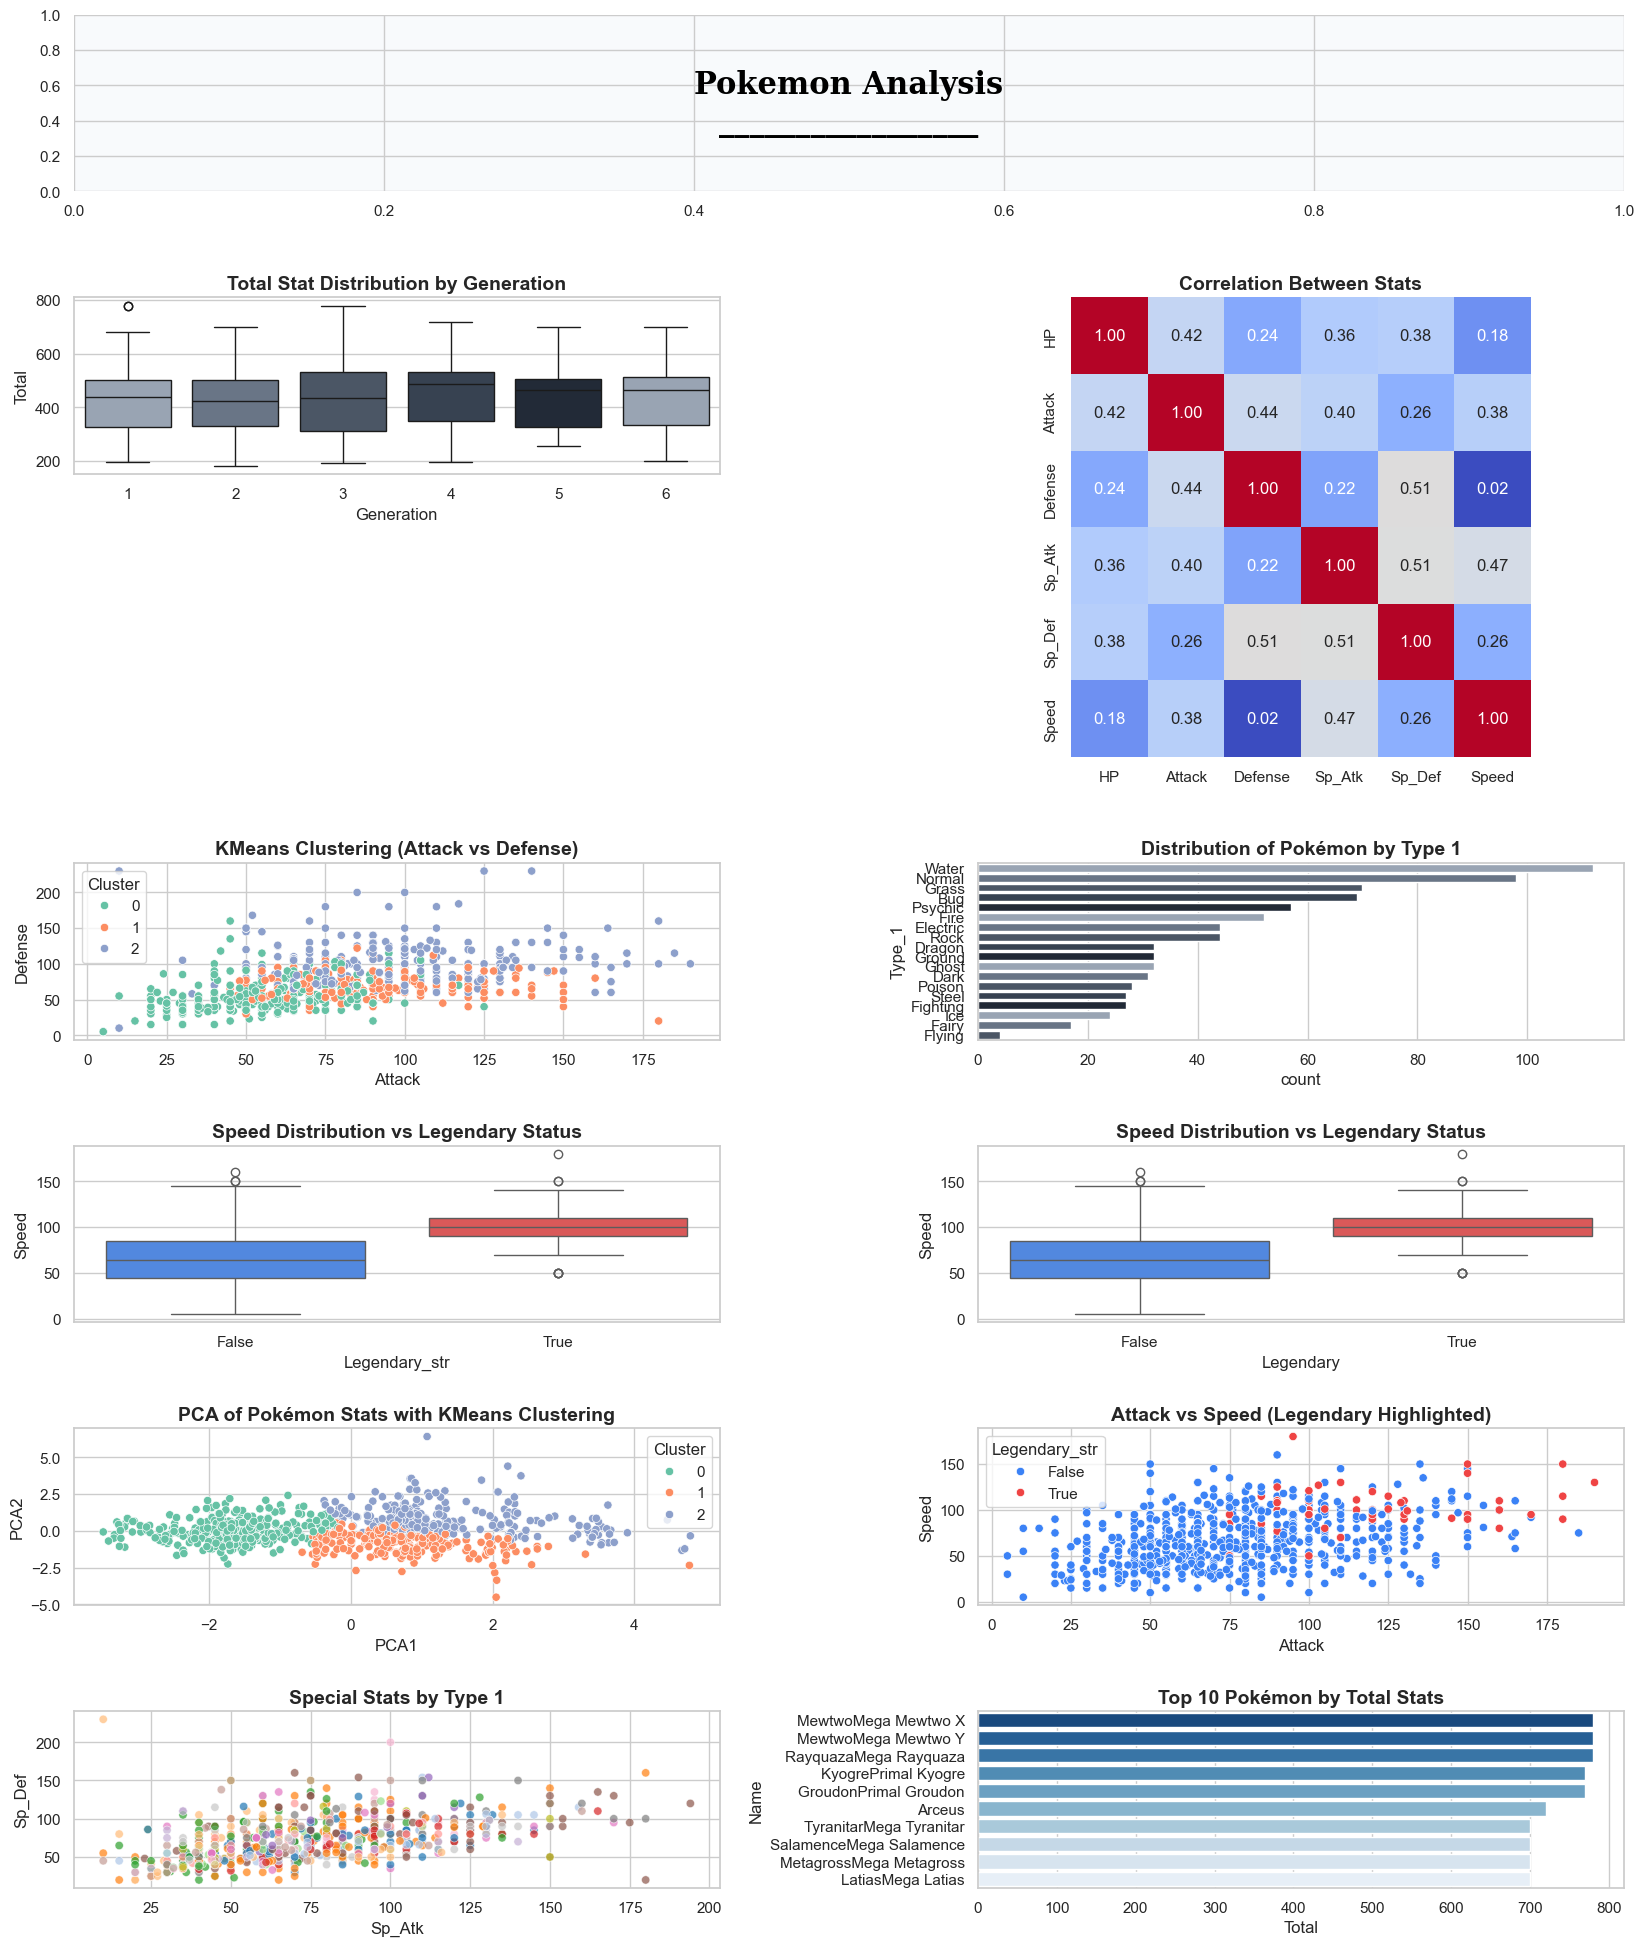

In [11]:
# Set background and color palette
background_color = "#f8fafc"
color_palette = ["#94a3b8", "#64748b", "#475569", "#334155", "#1e293b"]
data['Legendary_str'] = data['Legendary'].astype(str)
legend_palette = {"True": "#ef4444", "False": "#3b82f6"}

sns.set(style="whitegrid")

# 📊 Overall Layout with GridSpec
fig = plt.figure(figsize=(20, 28))
gs = fig.add_gridspec(8, 2)
gs.update(wspace=0.4, hspace=0.6)

# Title subplot
title_ax = fig.add_subplot(gs[0, :])
title_ax.set_facecolor(background_color)
title_ax.spines["bottom"].set_visible(False)
title_ax.spines["left"].set_visible(False)
title_ax.spines["top"].set_visible(False)
title_ax.spines["right"].set_visible(False)
title_ax.tick_params(left=False, bottom=False)
title_ax.text(0.5, 0.5,
                'Pokemon Analysis\n_________________',
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=22, fontweight='bold',
                fontfamily='serif',
                color="#000000")

# Assign axes with some custom spans
axes = [
    # 1. Total Stats by Generation
    fig.add_subplot(gs[1, 0]),  
    # 2. Correlation Heatmap (occupies more space)
    fig.add_subplot(gs[1:3, 1]),  
    # 3. KMeans Clustering
    fig.add_subplot(gs[3, 0]),  
    # 4. Type 1 Distribution
    fig.add_subplot(gs[3, 1]),  
    # 5. Generation vs Legendary
    fig.add_subplot(gs[4, 0]),  
    # 6. Speed vs Legendary
    fig.add_subplot(gs[4, 1]),  
    # 7. PCA Clustering
    fig.add_subplot(gs[5, 0]),  
    # 8. Attack vs Speed
    fig.add_subplot(gs[5, 1]),  
    # 9. Sp_Atk vs Sp_Def
    fig.add_subplot(gs[6, 0]),  
    # 10. Top Pokémon
    fig.add_subplot(gs[6, 1])   
]

# 🧬 1. Distribution of Total Stats by Generation
sns.boxplot(ax=axes[0], data=data, x='Generation', y='Total', palette=color_palette)
axes[0].set_title('Total Stat Distribution by Generation', fontsize=14, fontweight='bold')

# 🔥 2. Stat Heatmap (Correlation)
stats = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']
corr = data[stats].corr()
sns.heatmap(corr, ax=axes[1], annot=True, cmap="coolwarm", fmt=".2f", square=True, cbar=False)
axes[1].set_title('Correlation Between Stats', fontsize=14, fontweight='bold')

# 🧠 3. Clustering with KMeans (Stat Profile)
features = data[stats]
scaler = StandardScaler()
scaled_stats = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_stats)

sns.scatterplot(ax=axes[2], data=data, x='Attack', y='Defense', hue='Cluster', palette='Set2')
axes[2].set_title('KMeans Clustering (Attack vs Defense)', fontsize=14, fontweight='bold')

# 🌈 4. Type 1 Distribution
type_order = data['Type_1'].value_counts().index
sns.countplot(ax=axes[3], data=data, y='Type_1', order=type_order, palette=color_palette)
axes[3].set_title('Distribution of Pokémon by Type 1', fontsize=14, fontweight='bold')

# 🧬 5. Generation vs Legendary
sns.boxplot(ax=axes[4], data=data, x='Legendary_str', y='Speed', palette=legend_palette)
axes[4].set_title('Speed Distribution vs Legendary Status', fontsize=14, fontweight='bold')

# 🎯 6. Predicting Legendary - Stat Distribution
sns.boxplot(ax=axes[5], data=data, x='Legendary', y='Speed', palette=legend_palette)
axes[5].set_title('Speed Distribution vs Legendary Status', fontsize=14, fontweight='bold')

# 🌀 7. PCA Projection of Stat Clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_stats)
data['PCA1'], data['PCA2'] = pca_result[:, 0], pca_result[:, 1]

sns.scatterplot(ax=axes[6], data=data, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
axes[6].set_title('PCA of Pokémon Stats with KMeans Clustering', fontsize=14, fontweight='bold')

# 📈 8. Attack vs Speed (Legendary Highlighted)
sns.scatterplot(ax=axes[7], data=data, x='Attack', y='Speed', hue='Legendary_str', palette=legend_palette)
axes[7].set_title('Attack vs Speed (Legendary Highlighted)', fontsize=14, fontweight='bold')

# 🧪 9. Sp_Atk vs Sp_Def by Type
sns.scatterplot(ax=axes[8], data=data, x='Sp_Atk', y='Sp_Def', hue='Type_1', palette='tab20', alpha=0.7, legend=False)
axes[8].set_title('Special Stats by Type 1', fontsize=14, fontweight='bold')

# 🏆 10. Highlight Top Pokémon by Total Stats
top_pokemon = data.nlargest(10, 'Total')
sns.barplot(ax=axes[9], data=top_pokemon, x='Total', y='Name', palette='Blues_r')
axes[9].set_title('Top 10 Pokémon by Total Stats', fontsize=14, fontweight='bold')

# Show the Layout
plt.tight_layout()
plt.show()


In [12]:
# data.columns = data.columns.str.strip()
# stats_cols = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']
# color_palette = sns.color_palette("viridis", len(stats_cols))

# def show_pokemon_info(name):
#     name = name.strip().capitalize()
#     pokemon = data[data["Name"].str.lower() == name.lower()]
    
#     if pokemon.empty:
#         print(f"❌ No Pokémon found with the name '{name}'. Try again.")
#         return

#     pokemon = pokemon.iloc[0]
#     print(f"🔎 Details for: {pokemon['Name']}")
#     print("=".center(50, "="))
#     print(f"Type 1     : {pokemon['Type_1']}")
#     print(f"Type 2     : {pokemon['Type_2']}")
#     print(f"Generation : {pokemon['Generation']}")
#     print(f"Legendary  : {pokemon['Legendary']}")
#     print(f"Total      : {pokemon['Total']}")
#     print()

#     # Barplot of stats
#     stats = pokemon[stats_cols]
#     plt.figure(figsize=(8, 4))
#     sns.barplot(x=stats_cols, y=stats.values, palette=color_palette)
#     plt.title(f"Stats for {pokemon['Name']}", fontsize=14, weight='bold')
#     plt.ylabel("Value")
#     plt.ylim(0, 200)
#     plt.grid(True)
#     plt.show()

# # Widget para seleccionar por nombre
# name_input = widgets.Text(
#     value='Absol',
#     placeholder='Enter Pokémon name',
#     description='Name:',
#     layout=Layout(width='50%')
# )
# interact(show_pokemon_info, name=name_input)

In [23]:
# Set dark theme for all visualizations
plt.style.use('dark_background')
sns.set_style("darkgrid")
sns.set_palette("viridis")

# Clean column names
data.columns = data.columns.str.strip()
stats_columns = ['HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed']
color_palette = sns.color_palette("viridis", len(stats_columns))

# Display detailed information and stats visualization for a Pokémon.
def display_pokemon_stats(name):
    """    
    Args:
        name: Name of the Pokémon to display
    """
    # Clean and format input name
    name = name.strip().capitalize()
    pokemon = data[data["Name"].str.lower() == name.lower()]
    
    # Handle case when Pokémon isn't found
    if pokemon.empty:
        error_html = f"""
        <div style='color: #ff6b6b; background-color: #2d2d2d; 
                    padding: 10px; border-radius: 5px; 
                    border-left: 4px solid #ff6b6b;'>
            <strong>Error:</strong> No Pokémon found with name '{name}'. Please try again.
        </div>
        """
        display(widgets.HTML(error_html))
        return

    pokemon = pokemon.iloc[0]
    

    # Add custom CSS for the table
    style_html = """
    <style>
        #top5-table {
            width: 100%;
            color: white;
            border-collapse: collapse;
        }
        #top5-table th {
            background-color: #0984e3;
            padding: 8px 12px;
            text-align: left;
        }
        #top5-table td {
            padding: 8px 12px;
            border-bottom: 1px solid #4a4a4a;
        }
        #top5-table tr:hover {
            background-color: #3d3d3d;
        }
    </style>
    """
    

    # Create info display
    info_html = f"""
    <div style='background-color: #2d2d2d; padding: 15px; border-radius: 8px; 
                border-left: 5px solid #6c5ce7; margin-bottom: 20px;'>
        <h2 style='color: #6c5ce7; margin-top: 0;'>🔍 {pokemon['Name']}</h2>
        <div style='display: grid; grid-template-columns: 1fr 1fr; gap: 10px;'>
            <div><strong>Type 1:</strong> {pokemon['Type_1']}</div>
            <div><strong>Type 2:</strong> {pokemon['Type_2']}</div>
            <div><strong>Generation:</strong> {pokemon['Generation']}</div>
            <div><strong>Legendary:</strong> {pokemon['Legendary']}</div>
            <div><strong>Total Stats:</strong> <span style='color:#00b894'>{pokemon['Total']}</span></div>
        </div>
    </div>
    """
    display(widgets.HTML(info_html + style_html))
    
    # Create stats visualization
    plt.figure(figsize=(10, 5), facecolor='#2d2d2d')
    stats = pokemon[stats_columns]
    
    ax = sns.barplot(x=stats_columns, y=stats.values, palette=color_palette)
    plt.title(f"Base Stats for {pokemon['Name']}", 
                fontsize=16, weight='bold', pad=20, color='white')
    plt.ylabel("Stat Value", fontsize=12)
    plt.xlabel("Stat Type", fontsize=12)
    plt.ylim(0, 200)
    
    # Customize grid and ticks
    ax.grid(color='#4a4a4a', linestyle='--', linewidth=0.5)
    ax.tick_params(colors='white', labelsize=10)
    
    # Add value labels on each bar
    for p in ax.patches:
        ax.annotate(f"{int(p.get_height())}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points',
                    color='white')
    
    plt.tight_layout()
    plt.show()

# Create interactive widget
pokemon_input = widgets.Text(
    value='Absol',
    placeholder='Enter Pokémon name',
    description='Pokémon:',
    layout=Layout(width='70%'),
    style={'description_width': 'initial'}
)

# Add some styling to the widget
pokemon_input.style.handle_color = '#6c5ce7'
pokemon_input.layout.margin = '10px 0 20px 0'

# Display title
title = widgets.HTML(
    "<h1 style='color: #6c5ce7; text-align: center;'>Pokémon Stats Explorer</h1>"
)
display(title)

# Create interaction
interact(display_pokemon_stats, name=pokemon_input)

HTML(value="<h1 style='color: #6c5ce7; text-align: center;'>Pokémon Stats Explorer</h1>")

interactive(children=(Text(value='Absol', description='Pokémon:', layout=Layout(margin='10px 0 20px 0', width=…

<function __main__.display_pokemon_stats(name)>

In [14]:
# def show_type1_summary(type_1):
#     filtered = data[data["Type_1"] == type_1]

#     if filtered.empty:
#         print(f"❌ No Pokémon found with type '{type_1}'.")
#         return

#     print(f"🔎 Showing data for Type 1 = {type_1}")
#     print(f"Total Pokémon: {len(filtered)}")
    
#     # Boxplot por estadística
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(data=filtered[stats_cols], palette="coolwarm")
#     plt.title(f"📦 Stat Distribution for Type 1: {type_1}", fontsize=14, weight='bold')
#     plt.ylabel("Stat Value")
#     plt.grid(True)
#     plt.show()

#     # Top 5 Pokémon por 'Total'
#     top5 = filtered.nlargest(5, 'Total')[["Name", "Total"]]
#     display(top5.reset_index(drop=True))

# # Widget dropdown para seleccionar Type_1
# type_dropdown = widgets.Dropdown(
#     options=sorted(data["Type_1"].dropna().unique()),
#     description='Type_1:',
#     layout=Layout(width='50%')
# )
# interact(show_type1_summary, type_1=type_dropdown)

In [15]:
# Analyze and visualize statistics for Pokémon of a specific primary type.
def analyze_type1_stats(type_1):
    """    
    Args:
        type_1: The primary type to analyze
    """
    # Filter data for the selected type
    filtered_data = data[data["Type_1"] == type_1]
    
    # Handle case when no Pokémon found
    if filtered_data.empty:
        error_html = f"""
        <div style='color: #ff7675; background-color: #2d2d2d; 
                    padding: 12px; border-radius: 5px; 
                    border-left: 4px solid #ff7675;
                    margin-bottom: 20px;'>
            <strong>⚠️ No Pokémon Found:</strong> No Pokémon with primary type '{type_1}' exists in the dataset.
        </div>
        """
        display(widgets.HTML(error_html))
        return
    
    # Create summary header
    summary_html = f"""
    <div style='background-color: #2d2d2d; padding: 15px; border-radius: 8px; 
                border-left: 5px solid #0984e3; margin-bottom: 20px;'>
        <h2 style='color: #0984e3; margin-top: 0;'>📊 {type_1} Type Analysis</h2>
        <div style='display: grid; grid-template-columns: repeat(3, 1fr); gap: 10px;'>
            <div><strong>Total Pokémon:</strong> <span style='color:#00cec9'>{len(filtered_data)}</span></div>
            <div><strong>Average Total Stats:</strong> <span style='color:#00cec9'>{filtered_data['Total'].mean():.1f}</span></div>
            <div><strong>Strongest Pokémon:</strong> <span style='color:#00cec9'>{filtered_data.loc[filtered_data['Total'].idxmax(), 'Name']}</span></div>
        </div>
    </div>
    """
    display(widgets.HTML(summary_html))
    
    # Create boxplot visualization
    plt.figure(figsize=(12, 6), facecolor='#2d2d2d')
    ax = sns.boxplot(data=filtered_data[stats_columns], palette="viridis", width=0.6)
    
    plt.title(f"📊 Stat Distribution for {type_1} Type Pokémon", 
                fontsize=16, weight='bold', pad=20, color='white')
    plt.ylabel("Stat Value", fontsize=12)
    plt.xlabel("Stat Type", fontsize=12)
    
    # Customize grid and appearance
    ax.grid(color='#4a4a4a', linestyle='--', linewidth=0.5)
    ax.tick_params(colors='white', labelsize=10)
    ax.set_facecolor('#2d2d2d')
    
    # Add median value annotations
    for i, col in enumerate(stats_columns):
        median = filtered_data[col].median()
        ax.text(i, median, f"{median:.0f}", 
                ha='center', va='center', 
                fontsize=10, color='white',
                bbox=dict(facecolor='#2d2d2d', edgecolor='white', boxstyle='round,pad=0.3'))
    
    plt.tight_layout()
    plt.show()
    
    # Display top 5 Pokémon with styling
    top5 = filtered_data.nlargest(5, 'Total')[["Name", "Total", "Type_2"]]
    top5_html = f"""
    <div style='background-color: #2d2d2d; padding: 15px; border-radius: 8px; 
                border-left: 5px solid #00b894; margin-top: 20px;'>
        <h3 style='color: #00b894; margin-top: 0;'>🏆 Top 5 {type_1} Pokémon by Total Stats</h3>
        {top5.to_html(index=False, classes='dataframe', border=0, 
                        table_id='top5-table', justify='left')}
    </div>
    """
    
    # Add custom CSS for the table
    style_html = """
    <style>
        #top5-table {
            width: 100%;
            color: white;
            border-collapse: collapse;
        }
        #top5-table th {
            background-color: #0984e3;
            padding: 8px 12px;
            text-align: left;
        }
        #top5-table td {
            padding: 8px 12px;
            border-bottom: 1px solid #4a4a4a;
        }
        #top5-table tr:hover {
            background-color: #3d3d3d;
        }
    </style>
    """
    
    display(widgets.HTML(style_html + top5_html))

# Create enhanced dropdown widget
type_dropdown = widgets.Dropdown(
    options=sorted(data["Type_1"].dropna().unique()),
    value='Fire',  # Default selection
    description='Primary Type:',
    disabled=False,
    layout=Layout(width='70%', margin='20px 0'),
    style={'description_width': 'initial'}
)

# Add title and description
title_html = """
<div style='text-align: center; margin-bottom: 20px;'>
    <h1 style='color: #0984e3;'>Pokémon Type Analysis</h1>
    <p style='color: #b2bec3;'>Explore stat distributions by primary Pokémon type</p>
</div>
"""
display(widgets.HTML(title_html))

# Create interaction
interact(analyze_type1_stats, type_1=type_dropdown)

HTML(value="\n<div style='text-align: center; margin-bottom: 20px;'>\n    <h1 style='color: #0984e3;'>Pokémon …

interactive(children=(Dropdown(description='Primary Type:', index=6, layout=Layout(margin='20px 0', width='70%…

<function __main__.analyze_type1_stats(type_1)>

# CLUSTERING USING KMeans AND DBSCAN

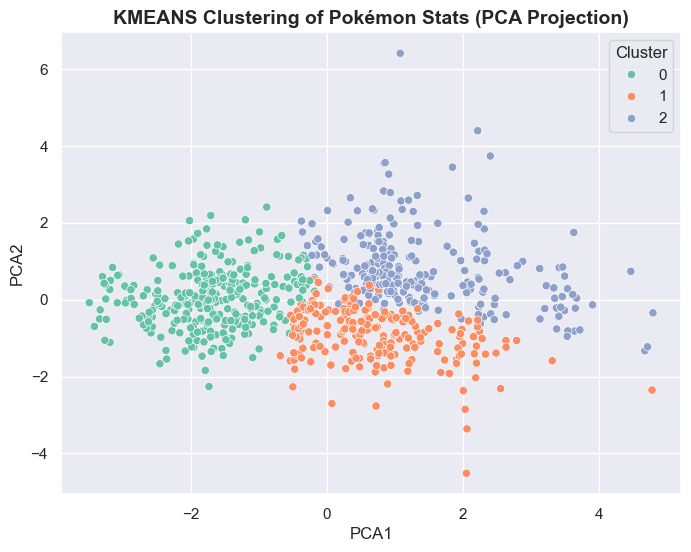

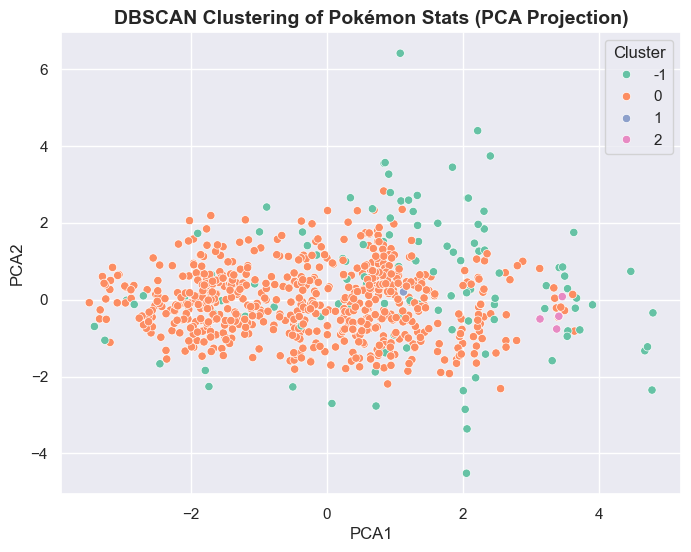

In [16]:
# Apply KMeans or DBSCAN clustering to Pokémon based on their stats.
def cluster_pokemon(data, method="kmeans", n_clusters=3):
    features = data[stats]
    scaler = StandardScaler()
    scaled_stats = scaler.fit_transform(features)

    if method == "kmeans":
        model = KMeans(n_clusters=n_clusters, random_state=42)
        data['Cluster'] = model.fit_predict(scaled_stats)
    elif method == "dbscan":
        model = DBSCAN(eps=1.2, min_samples=5)
        data['Cluster'] = model.fit_predict(scaled_stats)
    else:
        raise ValueError("Invalid method. Use 'kmeans' or 'dbscan'.")

    # PCA for 2D projection
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(scaled_stats)
    data['PCA1'], data['PCA2'] = pca_result[:, 0], pca_result[:, 1]

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
    plt.title(f'{method.upper()} Clustering of Pokémon Stats (PCA Projection)', fontsize=14, weight='bold')
    plt.show()
cluster_pokemon(data, method="kmeans", n_clusters=3)
cluster_pokemon(data, method="dbscan")

# STAT DISTRIBUTIONS BY GENERATION OR TYPE

In [17]:
# Plot boxplots of stats grouped by generation or primary type.
def plot_stat_distributions(data, group_by="Generation"):
    if group_by not in ["Generation", "Type_1"]:
        raise ValueError("group_by must be 'Generation' or 'Type_1'")

    melted = pd.melt(data, id_vars=[group_by], value_vars=stats, var_name="Stat", value_name="Value")

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=melted, x="Stat", y="Value", hue=group_by)
    plt.title(f'Stat Distributions Grouped by {group_by}', fontsize=14, weight='bold')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

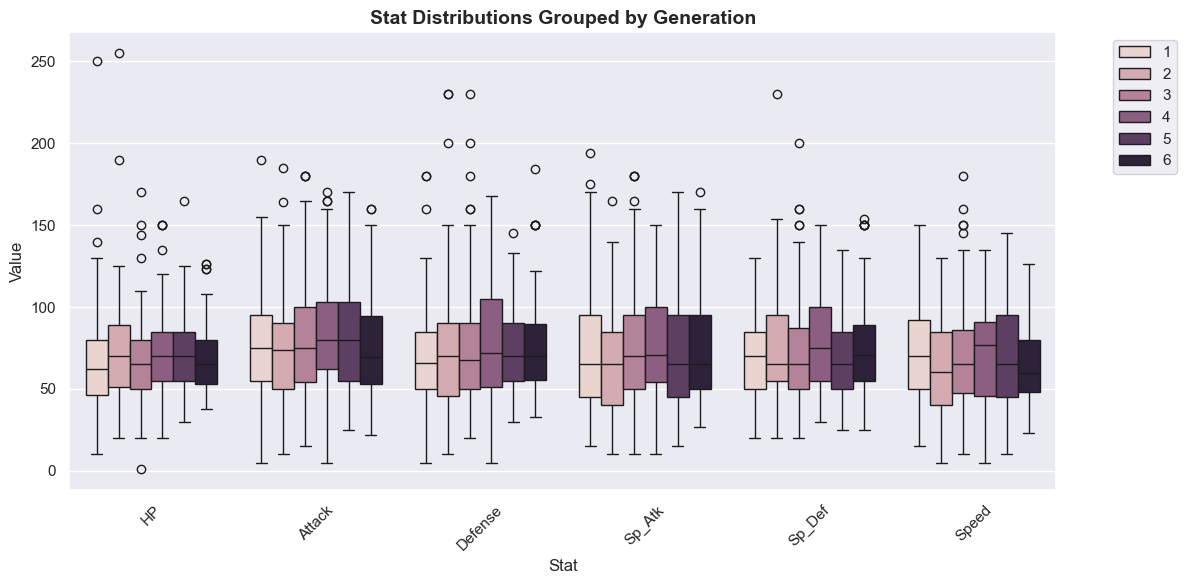

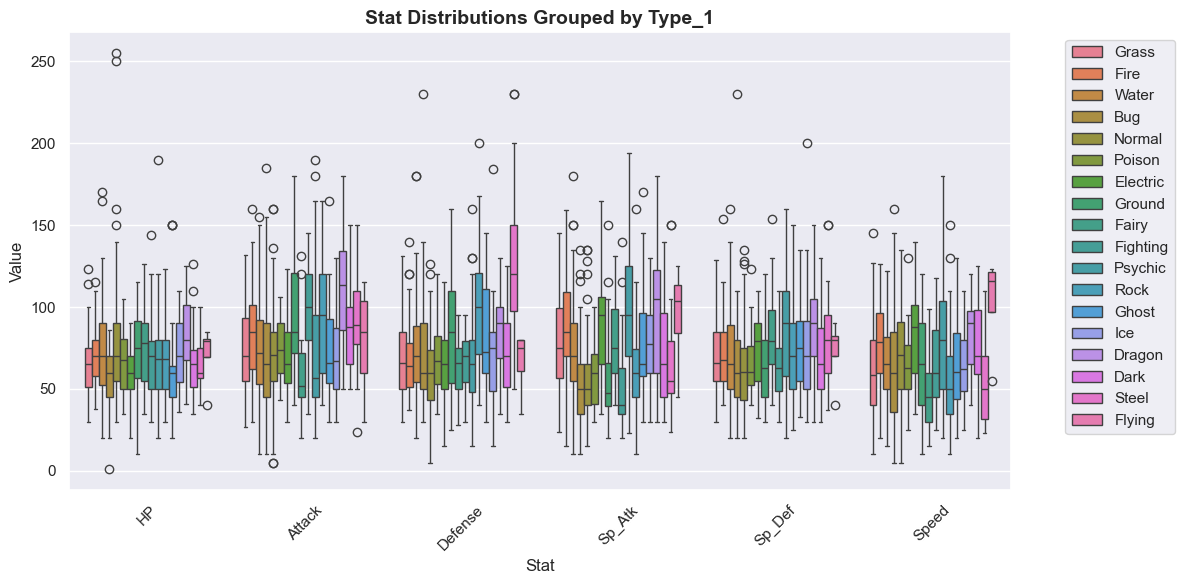

In [18]:
plot_stat_distributions(data, group_by="Generation")
plot_stat_distributions(data, group_by="Type_1")

# PREDICTING LEGENDARY STATUS

In [19]:
# Train classification models to predict whether a Pokémon is legendary.
def predict_legendary(data):
    X = data[stats]
    y = data["Legendary"]

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Random Forest Classifier
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    print("🎯 Random Forest Classifier Report:")
    print(classification_report(y_test, y_pred_rf))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_rf))

    # Logistic Regression
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred_lr = logreg.predict(X_test)

    print("\n📈 Logistic Regression Report:")
    print(classification_report(y_test, y_pred_lr))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_lr))

    # Return the model for optional use in feature importance
    return rf  

In [20]:
model = predict_legendary(data.copy())

🎯 Random Forest Classifier Report:
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       150
        True       0.75      0.60      0.67        10

    accuracy                           0.96       160
   macro avg       0.86      0.79      0.82       160
weighted avg       0.96      0.96      0.96       160

Confusion Matrix:
[[148   2]
 [  4   6]]

📈 Logistic Regression Report:
              precision    recall  f1-score   support

       False       0.97      0.97      0.97       150
        True       0.55      0.60      0.57        10

    accuracy                           0.94       160
   macro avg       0.76      0.78      0.77       160
weighted avg       0.95      0.94      0.94       160

Confusion Matrix:
[[145   5]
 [  4   6]]


# FEATURE IMPORTANCE VISUALIZATION

In [21]:
# Plot permutation-based feature importance using a trained model.
def plot_feature_importance(model, X, y, features=stats):
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42, scoring='accuracy')
    importances = pd.Series(result.importances_mean, index=features)

    plt.figure(figsize=(8, 4))
    importances.sort_values().plot(kind='barh', color='teal')
    plt.title("Feature Importance for Legendary Classification", fontsize=14, weight='bold')
    plt.xlabel("Mean Importance")
    plt.tight_layout()
    plt.show()

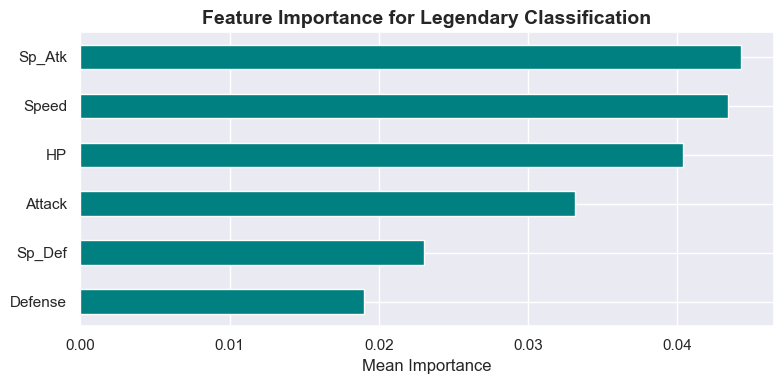

In [22]:
plot_feature_importance(model, StandardScaler().fit_transform(data[stats]), data["Legendary"])